In [1]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.all import *
from pathlib import Path
import torch
torch.cuda.set_device(3)

In [2]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
datapath = Path(os.getcwd())/"data/Sugarbeet"
print(datapath)

/raid10/active_users/adijat/ml/data/Sugarbeet


In [4]:
Path(os.getcwd())/"data/Sugarbeet"

Path('/raid10/active_users/adijat/ml/data/Sugarbeet')

In [5]:
Path(os.getcwd())/"Sugarbeet/stage_1"
Path(os.getcwd())/"Sugarbeet/stage_2"

Path('/raid10/active_users/adijat/ml/Sugarbeet/stage_2')

In [6]:
import os

data_path = os.path.join(os.getcwd(), "Sugarbeet")

apple_healthy_path = os.path.join(data_path, "stage_1")
blueberry_healthy_path = os.path.join(data_path, "stage_2")

print("Files in stage_1 directory:")
print(os.listdir(apple_healthy_path))

print("Files in stage_2 directory:")
print(os.listdir(blueberry_healthy_path))


Files in stage_1 directory:
['image-0128.jpg', 'image-00218.jpg', 'image-0567.jpg', 'image-1048.jpg', 'image-05710.jpg', 'image-0156.jpg', 'image-0129.jpg', 'image-070.jpg', 'image-0543.jpg', 'image-05512.jpg', 'image-01418.jpg', 'image-099.jpg', 'image-092.jpg', 'image-0025.jpg', 'image-0057.jpg', 'image-0903.jpg', 'image-1065.jpg', 'image-0513.jpg', 'image-01712.jpg', 'image-0055.jpg', 'image-0804.jpg', 'image-0762.jpg', 'image-0905.jpg', 'image-1047.jpg', 'image-053.jpg', 'image-0394.jpg', 'image-1232.jpg', 'image-04611.jpg', 'image-016.jpg', 'image-1104.jpg', 'image-01416.jpg', 'image-0423.jpg', 'image-0429.jpg', 'image-1043.jpg', 'image-0242.jpg', 'image-0069.jpg', 'image-0149.jpg', 'image-0782.jpg', 'image-01413.jpg', 'image-1002.jpg', 'image-0303.jpg', 'image-0844.jpg', 'image-072.jpg', 'image-0586.jpg', 'image-00811.jpg', 'image-0645.jpg', 'image-0085.jpg', 'image-0664.jpg', 'image-0445.jpg', 'image-0737.jpg', 'image-0457.jpg', 'image-0327.jpg', 'image-0696.jpg', 'image-00312.j

In [7]:
import os
from PIL import Image

image_path = "Sugarbeet"
apple_healthy_path = os.path.join(image_path, "stage_1")
blueberry_healthy_path = os.path.join(image_path, "stage_2")

# Loop through all the files in the directory
for filename in os.listdir(apple_healthy_path):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image file
        apple_img = Image.open(os.path.join(apple_healthy_path, filename))
        # Do something with the image
        print(apple_img.size)

(128, 116)
(252, 121)
(129, 177)
(383, 185)
(125, 117)
(176, 135)
(201, 62)
(193, 223)
(213, 155)
(117, 137)
(77, 104)
(231, 281)
(301, 282)
(229, 188)
(151, 160)
(257, 220)
(182, 336)
(242, 153)
(97, 81)
(135, 121)
(311, 269)
(181, 175)
(205, 287)
(55, 105)
(214, 183)
(127, 139)
(126, 207)
(42, 173)
(202, 206)
(206, 240)
(163, 152)
(239, 189)
(59, 150)
(251, 240)
(195, 189)
(161, 123)
(166, 208)
(205, 211)
(159, 219)
(280, 239)
(189, 235)
(320, 320)
(214, 243)
(221, 180)
(101, 70)
(161, 206)
(112, 123)
(262, 184)
(183, 299)
(87, 76)
(346, 179)
(127, 168)
(214, 252)
(122, 113)
(155, 172)
(158, 120)
(153, 151)
(123, 90)
(200, 133)
(229, 150)
(182, 181)
(199, 239)
(298, 188)
(226, 357)
(246, 151)
(204, 302)
(157, 190)
(268, 192)
(129, 202)
(157, 246)
(173, 230)
(173, 244)
(148, 125)
(171, 220)
(192, 187)
(159, 242)
(140, 179)
(213, 229)
(162, 120)
(273, 186)
(154, 204)
(120, 157)
(242, 137)
(102, 152)
(251, 168)
(143, 124)
(164, 154)
(164, 233)
(109, 171)
(159, 132)
(129, 94)
(245, 347)


In [8]:
from fastai.vision.all import *

# Define path to image dataset
path = Path("Sugarbeet")

# Define a function to get the label of an image based on its path
def get_label(file_path):
    return file_path.parent.name

# Define a DataBlock for loading and transforming the images
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_label,
    item_tfms=[Resize(224)],
    batch_tfms=[*aug_transforms()]
)

# Create dataloaders from the data
dls = data.dataloaders(path)


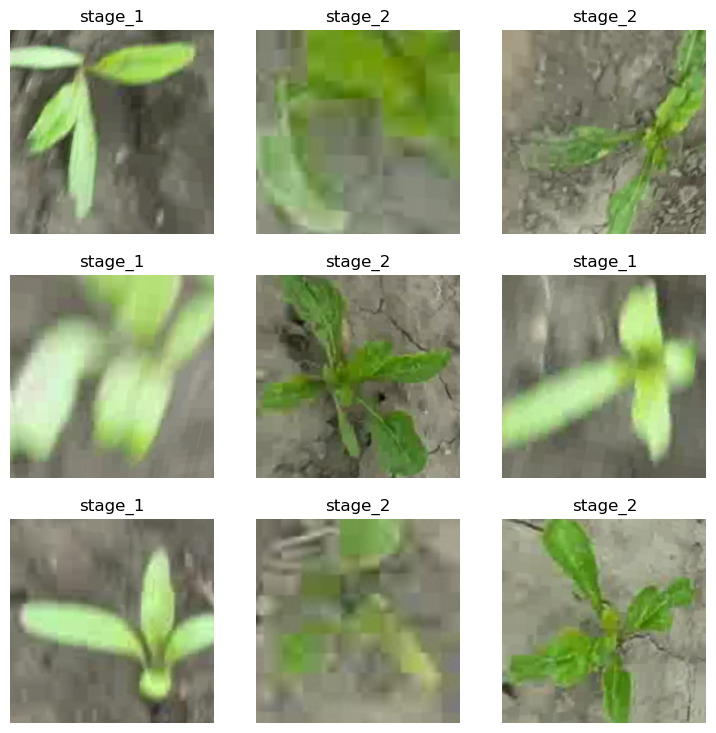

In [9]:
dls = data.dataloaders(Path("Sugarbeet"))
dls.show_batch()

In [10]:
# Load a pre-trained model
learn = vision_learner(dls, resnet50, metrics=accuracy)

/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# Fine-tune the model
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.303263,0.050930,0.990000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.071966,0.014366,0.995000,00:04


In [12]:
# Fine-tune the model
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.049170,0.021362,0.990000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.015724,0.002103,1.000000,00:04
1,0.024247,0.001281,1.000000,00:04
2,0.035439,0.000912,1.000000,00:04
3,0.027438,0.000244,1.000000,00:04
4,0.023549,0.026846,0.985000,00:04
5,0.018414,0.000294,1.000000,00:04
6,0.014679,0.000507,1.000000,00:04
7,0.013346,0.000101,1.000000,00:04
8,0.011058,0.000074,1.000000,00:04
9,0.011302,0.000025,1.000000,00:04


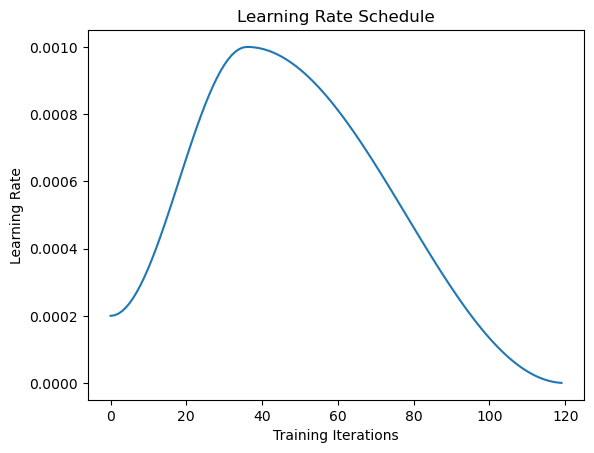

In [13]:
import matplotlib.pyplot as plt

# Get the learning rate values
lrs = learn.recorder.lrs

# Plot the learning rate schedule
plt.plot(range(len(lrs)), lrs)
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

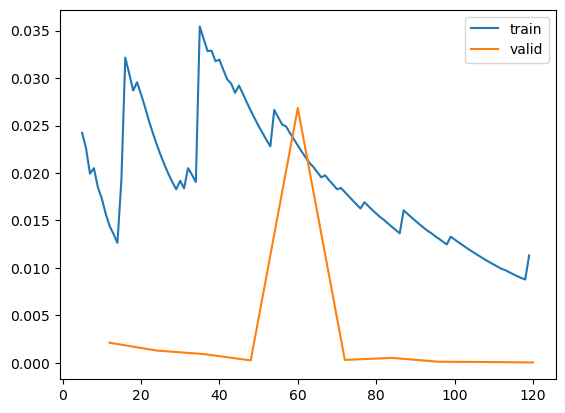

In [14]:
import matplotlib.pyplot as plt

# Create a recorder object
recorder = learn.recorder

# Plot the validation and training losses
recorder.plot_loss()


In [15]:
# Evaluate the model
acc = learn.validate()[1]
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [16]:
Path(os.getcwd())/"unlabeled"

Path('/raid10/active_users/adijat/ml/unlabeled')

In [18]:
import os

data_path = os.path.join(os.getcwd(), "unlabeled")

image_files = [file for file in os.listdir(data_path) if file.endswith(".jpg")]

print("Files in unlabeled directory:")
print(image_files)

Files in unlabeled directory:
['dji-55-image-12520.jpg', 'image-0408.jpg', 'image-01313.jpg', 'dji-55-image-12329.jpg', 'image-0853.jpg', 'dji-55-image-11012.jpg', 'dji-55-image-0893.jpg', 'dji-55-image-11218.jpg', 'dji-55-image-12910.jpg', 'image-048.jpg', 'image-01517.jpg', 'dji-55-image-04210.jpg', 'dji-55-image-064.jpg', 'dji-55-image-12016.jpg', 'dji-55-image-1273.jpg', 'dji-55-image-15012.jpg', 'dji-55-image-0019.jpg', 'dji-55-image-0595.jpg', 'dji-55-image-0769.jpg', 'dji-55-image-14320.jpg', 'image-00616.jpg', 'image-0105.jpg', 'image-0185.jpg', 'dji-55-image-0125.jpg', 'dji-55-image-0916.jpg', 'dji-55-image-0734.jpg', 'dji-55-image-0108.jpg', 'dji-55-image-12811.jpg', 'dji-55-image-14810.jpg', 'dji-55-image-0783.jpg', 'image-107.jpg', 'image-01311.jpg', 'dji-55-image-04010.jpg', 'dji-55-image-12614.jpg', 'dji-55-image-1443.jpg', 'dji-55-image-03612.jpg', 'dji-55-image-147.jpg', 'image-1302.jpg', 'image-106.jpg', 'image-0582.jpg', 'dji-55-image-10511.jpg', 'dji-55-image-012.jpg

In [20]:
import os
from PIL import Image

image_path = "unlabeled"

# Loop through all the files in the directory
for filename in os.listdir(image_path):
    # Check if the file is an image file
    if filename.endswith(".jpg"):
        # Open the image file
        image_file = os.path.join(image_path, filename)
        with Image.open(image_file) as img:
            # Do something with the image
            print(img.size)


(258, 312)
(175, 83)
(170, 173)
(307, 311)
(243, 227)
(268, 270)
(249, 281)
(112, 122)
(122, 137)
(190, 229)
(122, 116)
(345, 270)
(258, 316)
(344, 324)
(312, 300)
(260, 191)
(340, 346)
(285, 256)
(177, 197)
(154, 201)
(147, 104)
(210, 186)
(100, 145)
(187, 267)
(250, 240)
(139, 146)
(288, 284)
(263, 260)
(159, 149)
(234, 219)
(244, 209)
(129, 118)
(276, 308)
(158, 83)
(232, 197)
(345, 252)
(222, 255)
(252, 324)
(284, 162)
(198, 169)
(247, 162)
(262, 289)
(121, 217)
(304, 314)
(171, 224)
(221, 257)
(51, 152)
(208, 210)
(351, 386)
(103, 93)
(116, 210)
(185, 220)
(190, 176)
(297, 296)
(165, 200)
(146, 218)
(244, 151)
(88, 113)
(266, 277)
(112, 209)
(233, 118)
(292, 244)
(240, 231)
(280, 134)
(285, 193)
(208, 128)
(297, 250)
(288, 230)
(84, 103)
(283, 347)
(295, 281)
(290, 224)
(159, 143)
(173, 193)
(322, 289)
(183, 115)
(190, 152)
(371, 301)
(205, 175)
(302, 232)
(41, 95)
(119, 177)
(213, 305)
(254, 215)
(271, 215)
(83, 118)
(268, 130)
(261, 220)
(303, 292)
(297, 282)
(251, 279)
(188, 12

In [21]:
from fastai.vision.all import *

unlabeled_path = Path("unlabeled")

# Define a DataBlock for loading the unlabeled images
unlabeled_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,

    get_y=noop,  # No labels for unlabeled data
    item_tfms=[Resize(224)]
)

# Create a dataloader for the unlabeled data
unlabeled_dls = unlabeled_data.dataloaders(unlabeled_path, bs=64)


In [25]:
import torch

# Assuming you have a trained model named 'model'
model = resnet50(pretrained=False)

# Specify the file path where you want to save the model
model_path = 'model.newpth'

# Save the model
torch.save(model.state_dict(), model_path)


/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [27]:
model.load_state_dict(torch.load('model.newpth'))

<All keys matched successfully>

In [28]:
from torchvision.models import resnet50

model = resnet50()
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
import os
from PIL import Image
import torch
from torchvision import transforms

unlabeled_data_path = "unlabeled"  # Path to the directory containing unlabeled images

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define a threshold for confidence
confidence_threshold = 0.5

# Initialize a list to store the uncertain samples
uncertain_samples = []

# Iterate over the images in the folder
for image_file in os.listdir(unlabeled_data_path):
    # Construct the path to the image file
    image_path = os.path.join(unlabeled_data_path, image_file)
    
    # Check if the path is a file
    if not os.path.isfile(image_path):
        continue
    
    # Load and preprocess the image
    img = Image.open(image_path)
    img = transform(img)
    
    # Add an extra dimension to match the batch size expected by the model
    img = img.unsqueeze(0)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Disable gradient calculation since we're only doing inference
    with torch.no_grad():
        # Pass the preprocessed image through the model
        prediction = model(img)
    
    # Convert the prediction to probabilities using softmax
    probabilities = torch.softmax(prediction, dim=1)
    
    # Get the maximum predicted probability and its corresponding class
    max_prob, predicted_class = torch.max(probabilities, dim=1)
    
    # Check if the maximum predicted probability is below the confidence threshold
    if max_prob.item() < confidence_threshold:
        uncertain_samples.append(image_path)

# Print the uncertain samples
for sample in uncertain_samples:
    print(sample)


unlabeled/dji-55-image-12221.jpg
unlabeled/dji-55-image-0904.jpg
unlabeled/image-0918.jpg
unlabeled/dji-55-image-0245.jpg
unlabeled/dji-55-image-13411.jpg
unlabeled/image-0054.jpg
unlabeled/dji-55-image-07313.jpg
unlabeled/dji-55-image-07225.jpg
unlabeled/dji-55-image-1243.jpg
unlabeled/image-0052.jpg
unlabeled/image-081.jpg
unlabeled/image-0122.jpg
unlabeled/image-0629.jpg
unlabeled/dji-55-image-1485.jpg
unlabeled/dji-55-image-08315.jpg
unlabeled/dji-55-image-08115.jpg
unlabeled/dji-55-image-14010.jpg
unlabeled/dji-55-image-08812.jpg
unlabeled/dji-55-image-0572.jpg
unlabeled/dji-55-image-13324.jpg
unlabeled/dji-55-image-08010.jpg
unlabeled/image-0823.jpg
unlabeled/dji-55-image-066.jpg
unlabeled/dji-55-image-10412.jpg
unlabeled/dji-55-image-06613.jpg
unlabeled/image-0952.jpg
unlabeled/image-0893.jpg
unlabeled/dji-55-image-08713.jpg
unlabeled/dji-55-image-1006.jpg
unlabeled/dji-55-image-0754.jpg
unlabeled/dji-55-image-1285.jpg
unlabeled/dji-55-image-1454.jpg
unlabeled/dji-55-image-1203.

In [36]:
# Change the path to labeled data
labeled_data_path = "Sugarbeet"  # Path to the directory containing labeled images

# Specify the maximum number of samples to label
max_samples_to_label = 50

# Initialize a counter for labeled samples
labeled_samples_count = 0

# Iterate over the uncertain samples
for sample_path in uncertain_samples:
    # Check if the maximum number of samples to label has been reached
    if labeled_samples_count >= max_samples_to_label:
        break

    # Ask the user for the correct label
    correct_label = input(f"Enter the correct label for sample {sample_path}: ")
    
    # Create the subfolder path for the correct label
    correct_label_path = os.path.join(labeled_data_path, correct_label)
    
    # Create the subfolder if it doesn't exist
    os.makedirs(correct_label_path, exist_ok=True)
    
    # Move the sample to the correct label subfolder
    sample_filename = os.path.basename(sample_path)
    new_sample_path = os.path.join(correct_label_path, sample_filename)
    os.rename(sample_path, new_sample_path)
    
    # Increment the labeled samples count
    labeled_samples_count += 1

print("Annotation completed!")


Enter the correct label for sample unlabeled/dji-55-image-12221.jpg: stage_2
Enter the correct label for sample unlabeled/dji-55-image-0904.jpg: stage_2
Enter the correct label for sample unlabeled/image-0918.jpg: stage_1
Enter the correct label for sample unlabeled/dji-55-image-0245.jpg: stage_2
Enter the correct label for sample unlabeled/dji-55-image-13411.jpg: stage_2
Enter the correct label for sample unlabeled/image-0054.jpg: stage_1
Enter the correct label for sample unlabeled/dji-55-image-07313.jpg: stage_2
Enter the correct label for sample unlabeled/dji-55-image-07225.jpg: stage_2
Enter the correct label for sample unlabeled/dji-55-image-1243.jpg: stage_2
Enter the correct label for sample unlabeled/image-0052.jpg: stage_1
Enter the correct label for sample unlabeled/image-081.jpg: stage_1
Enter the correct label for sample unlabeled/image-0122.jpg: stage_1
Enter the correct label for sample unlabeled/image-0629.jpg: stage_1
Enter the correct label for sample unlabeled/dji-55

In [37]:
import os

data_path = os.path.join(os.getcwd(), "Sugarbeet")

apple_healthy_path = os.path.join(data_path, "stage_1")
blueberry_healthy_path = os.path.join(data_path, "stage_2")

print("Files in stage_1 directory:")
print(os.listdir(apple_healthy_path))

print("Files in stage_2 directory:")
print(os.listdir(blueberry_healthy_path))


Files in stage_1 directory:
['image-0408.jpg', 'image-01313.jpg', 'image-0128.jpg', 'image-0853.jpg', 'image-00218.jpg', 'image-048.jpg', 'image-01517.jpg', 'image-00616.jpg', 'image-0105.jpg', 'image-0185.jpg', 'image-0567.jpg', 'image-107.jpg', 'image-1048.jpg', 'image-05710.jpg', 'image-0156.jpg', 'image-0129.jpg', 'image-070.jpg', 'image-1302.jpg', 'image-106.jpg', 'image-0543.jpg', 'image-0582.jpg', 'image-02611.jpg', 'image-05512.jpg', 'image-0546.jpg', 'image-0076.jpg', 'image-01418.jpg', 'image-0416.jpg', 'image-0628.jpg', 'image-099.jpg', 'image-0704.jpg', 'image-0592.jpg', 'image-092.jpg', 'image-0918.jpg', 'image-0025.jpg', 'image-0057.jpg', 'image-0054.jpg', 'image-0052.jpg', 'image-081.jpg', 'image-0122.jpg', 'image-0903.jpg', 'image-0629.jpg', 'image-1065.jpg', 'image-0513.jpg', 'image-0823.jpg', 'image-01712.jpg', 'image-0055.jpg', 'image-0952.jpg', 'image-0893.jpg', 'image-0804.jpg', 'image-073.jpg', 'image-0499.jpg', 'image-0762.jpg', 'image-0905.jpg', 'image-1047.jpg'

In [38]:
import os
from PIL import Image

image_path = "Sugarbeet"
apple_healthy_path = os.path.join(image_path, "stage_1")
blueberry_healthy_path = os.path.join(image_path, "stage_2")

# Loop through all the files in the directory
for filename in os.listdir(apple_healthy_path):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image file
        apple_img = Image.open(os.path.join(apple_healthy_path, filename))
        # Do something with the image
        print(apple_img.size)

(175, 83)
(170, 173)
(128, 116)
(243, 227)
(252, 121)
(190, 229)
(122, 116)
(147, 104)
(210, 186)
(100, 145)
(129, 177)
(244, 209)
(383, 185)
(125, 117)
(176, 135)
(201, 62)
(193, 223)
(252, 324)
(284, 162)
(213, 155)
(198, 169)
(121, 217)
(117, 137)
(221, 257)
(190, 176)
(77, 104)
(165, 200)
(146, 218)
(231, 281)
(88, 113)
(285, 193)
(301, 282)
(84, 103)
(229, 188)
(151, 160)
(173, 193)
(119, 177)
(254, 215)
(271, 215)
(257, 220)
(83, 118)
(182, 336)
(242, 153)
(167, 181)
(97, 81)
(135, 121)
(221, 273)
(198, 304)
(311, 269)
(140, 149)
(243, 150)
(181, 175)
(205, 287)
(55, 105)
(214, 183)
(127, 139)
(126, 207)
(42, 173)
(202, 206)
(206, 240)
(163, 152)
(239, 189)
(59, 150)
(251, 240)
(195, 189)
(161, 123)
(166, 208)
(205, 211)
(159, 219)
(280, 239)
(189, 235)
(320, 320)
(214, 243)
(221, 180)
(101, 70)
(161, 206)
(112, 123)
(262, 184)
(183, 299)
(87, 76)
(346, 179)
(127, 168)
(214, 252)
(122, 113)
(155, 172)
(158, 120)
(153, 151)
(123, 90)
(200, 133)
(229, 150)
(182, 181)
(199, 239)
(29

In [39]:
from fastai.vision.all import *

# Define path to image dataset
path = Path("Sugarbeet")

# Define a function to get the label of an image based on its path
def get_label(file_path):
    return file_path.parent.name

# Define a DataBlock for loading and transforming the images
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_label,
    item_tfms=[Resize(224)],
    batch_tfms=[*aug_transforms()]
)

# Create dataloaders from the data
dls = data.dataloaders(path)


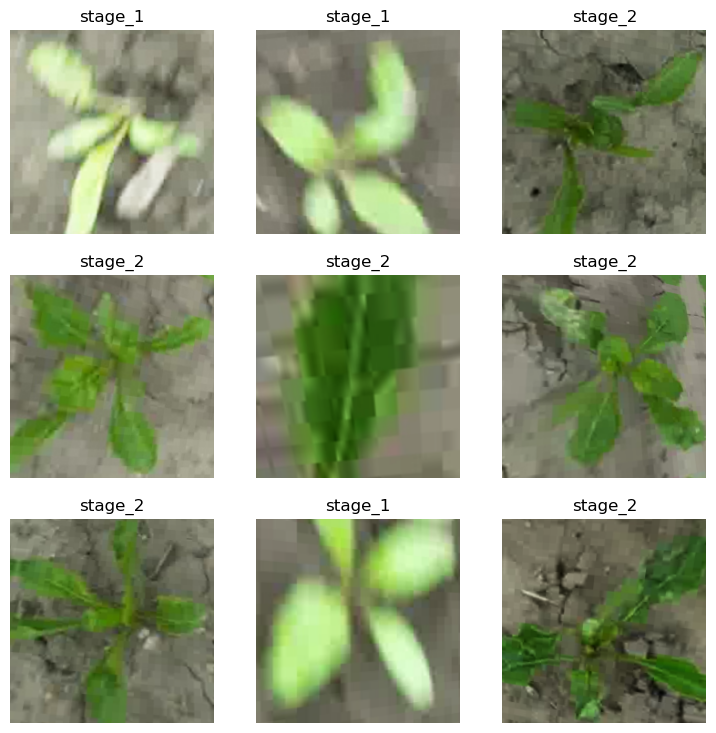

In [40]:
dls = data.dataloaders(Path("Sugarbeet"))
dls.show_batch()

In [41]:
# Set the model to training mode
model.train()

# Define your loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [44]:
import os
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

# Set the labeled data path
labeled_data_path = "Sugarbeet"

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Create the labeled dataset
labeled_dataset = ImageFolder(labeled_data_path, transform=transform)

# Create a data loader for the labeled dataset
labeled_data_loader = DataLoader(labeled_dataset, batch_size=32, shuffle=True)

# Train the model on the newly labeled data
num_epochs = 10  # Set the number of training epochs

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("------------------------")
    
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0
    
    for inputs, labels in labeled_data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(labeled_dataset)
    train_accuracy = 100.0 * train_correct / len(labeled_dataset)
    
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%")


Epoch 1/10
------------------------
Train Loss: 0.1556 | Train Accuracy: 96.82%
Epoch 2/10
------------------------
Train Loss: 0.1311 | Train Accuracy: 97.20%
Epoch 3/10
------------------------
Train Loss: 0.1107 | Train Accuracy: 97.29%
Epoch 4/10
------------------------
Train Loss: 0.0962 | Train Accuracy: 97.85%
Epoch 5/10
------------------------
Train Loss: 0.0870 | Train Accuracy: 98.04%
Epoch 6/10
------------------------
Train Loss: 0.0792 | Train Accuracy: 98.04%
Epoch 7/10
------------------------
Train Loss: 0.0706 | Train Accuracy: 98.60%
Epoch 8/10
------------------------
Train Loss: 0.0653 | Train Accuracy: 98.41%
Epoch 9/10
------------------------
Train Loss: 0.0622 | Train Accuracy: 98.60%
Epoch 10/10
------------------------
Train Loss: 0.0541 | Train Accuracy: 98.60%


In [45]:
# Evaluate the model
acc = learn.validate()[1]
print(f"Accuracy: {acc}")

Accuracy: 1.0
